In [112]:
from IPython.display import Image
from IPython.core.display import HTML 

import warnings
warnings.filterwarnings('ignore')

## [DSO] Machine Learning Seminar Vol.2
2020-02-xx  
SKUE

## Chapter3：分類問題-機械学習ライブラリscikit-learnの活用
+ a
+ b
+ c

### 分類アルゴリズムの選択
+ 1.特徴量を選択し、トレーニングサンプルを収集する
+ 2.性能評価
+ 3.分類器と最適化アルゴリズムを選択する
+ 4.モデルの性能を評価する
+ 5.アルゴリズムを調整する

### パーセプトロン

#### パーセプトロンのトレーニング

In [23]:
# パーセプトロンのトレーニング
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


クラスラベルを整数として符号化するのが慣例

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                                                        y,
                                                                                        test_size=0.3, # テスト用データの割合
                                                                                        random_state=1, # 乱数seedの固定
                                                                                        stratify=y # If not None, data is split in a stratified fashion, using this as the class labels.
                                                                                                          # 引数stratifyに均等に分割させたいデータ（多くの場合は正解ラベル）を指定すると、
                                                                                                          # そのデータの値の比率が一致するように分割される。
                                                                                       )
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 2)
(45, 2)
(105,)
(45,)


In [16]:
# Count number of occurrences of each value in array of non-negative ints.
print('Labels counts in y:', np.bincount(y))

print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


In [18]:
from sklearn.preprocessing import StandardScaler

# Standardize features by removing the mean and scaling to unit variance
# The standard score of a sample x is calculated as:
# z = (x - u) / s
sc = StandardScaler()

sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [19]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(n_iter=40, eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

/Users/Sakaue/anaconda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
      fit_intercept=True, max_iter=None, n_iter=40, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=1, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False)

In [22]:
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 9


In [26]:
from sklearn.metrics import accuracy_score

print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Accuracy: %.2f' % ppn.score(X_test_std, y_test)) # scoreメソッドでも同じことができる。

Accuracy: 0.80
Accuracy: 0.80


In [39]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v') # マーカー
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan') # 色
    cmap = ListedColormap(colors[:len(np.unique(y))]) # Colormap object generated from a list of colors.
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1 # 領域を描くに際して最大値、最小値の情報を取得
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), # Return coordinate matrices from coordinate vectors.
                                              np.arange(x2_min, x2_max, resolution)) # resolutionはgridの1単位に該当する
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T) # ravelで1次元のベクトルにして転置して予測
    Z = Z.reshape(xx1.shape)  # Zはただのベクトルなのでxx1と同じデータ構造に変換する
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap) # 等高線を描く
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)): # enumerateは引数にリストなどのイテラブルオブジェクトを指定すると、インデックス番号(idx)と要素(cl)が取得できる。
        plt.scatter(x = X[y == cl, 0],
                            y = X[y == cl, 1],
                            alpha = 0.8,
                            c = colors[idx],
                            marker=markers[idx],
                            label=cl,
                            edgecolor='black'
                            )
        
        # テストサンプルを目立たせる
        if test_idx:
            # すべてのサンプルをプロット
            X_test, y_test = X[test_idx, :], y[test_idx]
            plt.scatter(X_test[:, 0], X_test[:, 1],
                               c='',
                               edgecolor='black',
                               alpha=1.0,
                               linewidth=1,
                               marker='o',
                               s=100,
                               label='test set')

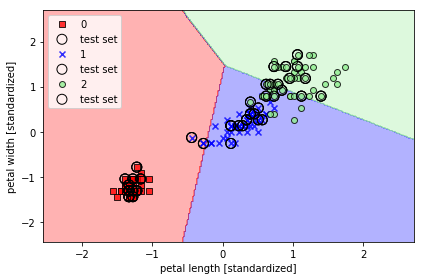

In [43]:
# トレーニングとテストデータの特徴量を行方向に結合
X_combined_std = np.vstack((X_train_std, X_test_std))
# トレーニングデータとテストデータのクラスラベルを結合
y_combined = np.hstack((y_train, y_test))
# 決定境界のプロット
plot_decision_regions(X=X_combined_std,
                                        y=y_combined,
                                        classifier=ppn,
                                        test_idx=range(105, 150)
                                        )
# 軸ラベルの設定
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
# 凡例の設定（左上に配置）
plt.legend(loc='upper left');
plt.tight_layout();
plt.show();

#### scikit-learnの線形モデル（40個くらいある）
+ linear_model.LogisticRegression([penalty, …]):Logistic Regression (aka logit, MaxEnt) classifier.
+ linear_model.LogisticRegressionCV([Cs, …]):Logistic Regression CV (aka logit, MaxEnt) classifier.
+ linear_model.PassiveAggressiveClassifier([…]):Passive Aggressive Classifier
+ linear_model.Perceptron([penalty, alpha, …]):Read more in the User Guide.
+ linear_model.RidgeClassifier([alpha, …]):Classifier using Ridge regression.
+ linear_model.RidgeClassifierCV([alphas, …]):Ridge classifier with built-in cross-validation.
+ linear_model.SGDClassifier([loss, penalty, …]):Linear classifiers (SVM, logistic regression, a.o.) with SGD training.


+ linear_model.LinearRegression([…]):Ordinary least squares Linear Regression.
+ linear_model.Ridge([alpha, fit_intercept, …]):Linear least squares with l2 regularization.
+ linear_model.RidgeCV([alphas, …]):Ridge regression with built-in cross-validation.
+ linear_model.SGDRegressor([loss, penalty, …]):Linear model fitted by minimizing a regularized empirical loss with SGD

+ linear_model.ElasticNet([alpha, l1_ratio, …]):Linear regression with combined L1 and L2 priors as regularizer.
+ linear_model.ElasticNetCV([l1_ratio, eps, …]):Elastic Net model with iterative fitting along a regularization path.
+ linear_model.Lars([fit_intercept, verbose, …]):Least Angle Regression model a.k.a.
+ linear_model.LarsCV([fit_intercept, …]):Cross-validated Least Angle Regression model.
+ linear_model.Lasso([alpha, fit_intercept, …]):Linear Model trained with L1 prior as regularizer (aka the Lasso)
+ linear_model.LassoCV([eps, n_alphas, …]):Lasso linear model with iterative fitting along a regularization path.
+ linear_model.LassoLars([alpha, …]):Lasso model fit with Least Angle Regression a.k.a.
+ linear_model.LassoLarsCV([fit_intercept, …]):Cross-validated Lasso, using the LARS algorithm.
+ linear_model.LassoLarsIC([criterion, …]):Lasso model fit with Lars using BIC or AIC for model selection
+ linear_model.OrthogonalMatchingPursuit([…]):Orthogonal Matching Pursuit model (OMP)
+ linear_model.OrthogonalMatchingPursuitCV([…]):Cross-validated Orthogonal Matching Pursuit model (OMP).

+ linear_model.ARDRegression([n_iter, tol, …]):Bayesian ARD regression.
+ linear_model.BayesianRidge([n_iter, tol, …]):Bayesian ridge regression.

+ linear_model.MultiTaskElasticNet([alpha, …]):Multi-task ElasticNet model trained with L1/L2 mixed-norm as regularizer
+ linear_model.MultiTaskElasticNetCV([…]):Multi-task L1/L2 ElasticNet with built-in cross-validation.
+ linear_model.MultiTaskLasso([alpha, …]):Multi-task Lasso model trained with L1/L2 mixed-norm as regularizer.
+ linear_model.MultiTaskLassoCV([eps, …]):Multi-task Lasso model trained with L1/L2 mixed-norm as regularizer.

+ linear_model.HuberRegressor([epsilon, …]):Linear regression model that is robust to outliers.
+ linear_model.RANSACRegressor([…]):RANSAC (RANdom SAmple Consensus) algorithm.
+ linear_model.TheilSenRegressor([…]):Theil-Sen Estimator: robust multivariate regression model.

+ linear_model.PassiveAggressiveRegressor([C, …]):Passive Aggressive Regressor
+ linear_model.enet_path(X, y[, l1_ratio, …]):Compute elastic net path with coordinate descent.
+ linear_model.lars_path(X, y[, Xy, Gram, …]):Compute Least Angle Regression or Lasso path using LARS algorithm [1]
+ linear_model.lars_path_gram(Xy, Gram, n_samples):lars_path in the sufficient stats mode [1]
+ linear_model.lasso_path(X, y[, eps, …]):Compute Lasso path with coordinate descent
+ linear_model.orthogonal_mp(X, y[, …]):Orthogonal Matching Pursuit (OMP)
+ linear_model.orthogonal_mp_gram(Gram, Xy[, …]):Gram Orthogonal Matching Pursuit (OMP)
+ linear_model.ridge_regression(X, y, alpha[, …]):Solve the ridge equation by the method of normal equations.

### ロジスティック回帰
+ 分類モデル（多クラス問題も扱える）
+ 線形モデル

ロジット関数
$$
logit(p) = log \frac{p}{(1-p)}
$$
はオッズ比
$$
\frac{p}{(1-p)}
$$
の自然対数となる。
ロジット関数は特徴量の値と対数オッズとの間の線形関係を表すことができる。
$$
logit(p(y=1 | x)) = w_0 x_0 + w_1 x_1 + \dots + w_1 x_m = \sum _{i=0}^{m} w_i x_i = w^{T}x
$$
よって、  
$$
log \frac{p}{(1-p)} =  w^{T}x
$$
変形すると、
$$
p = \frac{e^{w^{T}x}}{1+e^{w^{T}x}} = \frac{1}{1+e^{-w^{T}x}}
$$
となる。この関数は値域が0から1の間に収まるため、割合などの予測に適している。また、この関数は以下のようにも表現できる。  
$$
\phi (z ) = \frac{1}{1+e^{-z}} \\
z = w^{T}x=w_0 x_0 + w_1 x_1 + \dots + w_m x_m
$$
なお、ここでのw_0はバイアスユニットを表し、x_0は１に設定される。

In [66]:
Image(url="https://sebastianraschka.com/images/faq/logisticregr-neuralnet/schematic.png")

#### シグモイド関数をプロットしてみる

In [64]:
import matplotlib.pyplot as plt
import numpy as np

# シグモイド関数を定義
def sigmoid(z):
    return 1.0/ (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

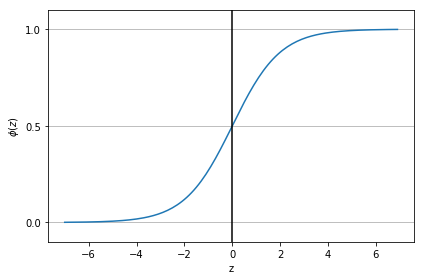

In [65]:
plt.plot(z, phi_z);
plt.axvline(0.0, color='k');
plt.ylim(-0.1, 1.1);
plt.xlabel('z');
plt.ylabel('$\phi (z)$');
plt.yticks([0.0, 0.5, 1.0]);
ax = plt.gca();
ax.yaxis.grid(True);
figure = plt.tight_layout()

このシグモイド関数の出力は、インスタンスがクラス1に属している確率  
$$
\phi (z) = P(y=1 | x;w)
$$
として表すことができる。  クラスが2つしかない場合、  以下のように、もう片方のクラスの確率を簡単に計算できる。
$$
\phi (z) = P(y=1 | x;w) = 0.8 \\
1 - \phi (z) =  P(y=0 | x;w) = 0.2 
$$

二値分類の際は、確率に対して閾値関数を使用することで変換すればよい。
$$
    \hat y =
        \begin{cases}
            1 \quad \phi (z) \geqq 0.5 \\
            0 \quad \phi (z) < 0.5 \\
        \end{cases}
$$
なお、z=0のときφ(0)=0.5であるから、先程の図から明らかなように、この前後でzが負値から正値に切り替わることがわかる。そのため、
$$
    \hat y =
        \begin{cases}
            1 \quad z \geqq 0.0 \\
            0 \quad z < 0.0 \\
        \end{cases}
$$
と書き換えることができる。  
scikit-learnのソースコードを実際に見てみると前述の式と同様に、zが正か負かによってラベルを割り当てているのがわかる。

#### scikit-learnのソースコード

In [73]:
# scikit-learnのソースコードを実際に見てみると前述の式と同様に、zが正か負かによってラベルを割り当てているのがわかる。
# https://github.com/scikit-learn/scikit-learn/blob/b194674c4/sklearn/linear_model/_base.py#L279
# def predict(self, X):
#     """
#     Predict class labels for samples in X.
#     Parameters
#     ----------
#     X : array_like or sparse matrix, shape (n_samples, n_features)
#         Samples.
#     Returns
#     -------
#     C : array, shape [n_samples]
#         Predicted class label per sample.
#     """
#     scores = self.decision_function(X)
#     if len(scores.shape) == 1:
#         indices = (scores > 0).astype(np.int)
#     else:
#         indices = scores.argmax(axis=1)
#     return self.classes_[indices]

In [75]:
# decision_functionでは内積の計算をしている。
# def decision_function(self, X):
#         """
#         Predict confidence scores for samples.
#         The confidence score for a sample is the signed distance of that
#         sample to the hyperplane.
#         Parameters
#         ----------
#         X : array_like or sparse matrix, shape (n_samples, n_features)
#             Samples.
#         Returns
#         -------
#         array, shape=(n_samples,) if n_classes == 2 else (n_samples, n_classes)
#             Confidence scores per (sample, class) combination. In the binary
#             case, confidence score for self.classes_[1] where >0 means this
#             class would be predicted.
#         """
#         check_is_fitted(self)

#         X = check_array(X, accept_sparse='csr')

#         n_features = self.coef_.shape[1]
#         if X.shape[1] != n_features:
#             raise ValueError("X has %d features per sample; expecting %d"
#                              % (X.shape[1], n_features))

#         scores = safe_sparse_dot(X, self.coef_.T,
#                                  dense_output=True) + self.intercept_
#         return scores.ravel() if scores.shape[1] == 1 else scores

#### 重みの学習
前章（2章）では誤差平方和をコスト関数としてそれを最小にするパラメータを勾配降下法・確率的勾配降下法により求めていった。ロジスティック回帰モデルの場合は尤度関数を目的関数として、それの最大化を行う。  
尤度とはパラメータが与えられたもとでの、データの出現しやすさを表している。  
今、自分の目の前にデータがあるが、そのデータは特定の分布から発生して、実際に観測されるものは発生しやすいものだろうとする考え方に従っている。（頻度主義）  

+ 考え方
  + データがある
    + 発生しやすいからこそ観測されたと考える  
      + 特定の分布を仮定する  
       + 発生しやすさ（尤度）が最も高くなるようパラメータを決める（尤度関数の最適化）  

尤度関数は以下のように表される。
$$
L(w) = P(y | x;w) = \prod_{i=1}^{n} P(y^{(i)} | x^{(i)};w) =  \prod_{i=1}^{n}( \phi ( z^{(i)} ) )^{y^{(i)}} (1 - \phi ( z^{(i)} ) )^{1-y^{(i)}}
$$
計算のしやすさから、これの対数をとった対数尤度の最大化を行っていく。
$$
l(w) = \log L(w) = \sum _{i=1}^{n} [ y^{(i)} \log ( \phi (z^{(i)}) ) + (1-y^{(i)}) \log (1-\phi(z^{(i)})) ]
$$

In [77]:
Image(url="https://images.slideplayer.com/25/7690722/slides/slide_9.jpg")

#### 勾配降下法などで最小化するためのコスト関数として対数尤度を書き換える
最大化の関数に-1をかければ最小化の問題に置き換えることができる。
$$
J(w) = \sum _{i=1} ^{n}[- y^{(i)} \log ( \phi (z^{(i)}) ) - (1-y^{(i)}) \log(1- \phi (z^{(i)}) ) ]
$$
理解がしやすいようにインスタンスが一つのケースを見てみると
$$
J( \phi (z) , y ; w) = - y \log (\phi (z)) - (1-y) \log(1-\phi ( z))
$$
ラベルであるyが1ないし0のときは以下のように場合分けができる。

$$
     J( \phi (z) , y ; w) =
        \begin{cases}
            (-1) \log ( \phi (z)) \quad y = 1 \\
            (-1) \log (1- \phi (z)) \quad y =  0 \\
        \end{cases}
$$

In [89]:
def cost_1(z):
    return -np.log(sigmoid(z))
def cost_0(z):
    return -np.log( 1- sigmoid(z))
z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)
c1 = [cost_1(x) for x in z]
c0 = [cost_0(x) for x in z]

クラスに属する確率φ(z)の様々な値に応じた分類コスト関数の値域。なお、zの定義域は[-10, 10]としている。  
クラスが1のときに、クラスが1である確率が高ければ、分類コスト関数は小さくなることがわかる。    
逆に、クラスが1のときにクラスが1である確率が低ければ、分類コストは高くなる。  
その場合は、分類コストを下げるためにクラスが1である確率を上げるためにパラメータを調整していく必要がある。

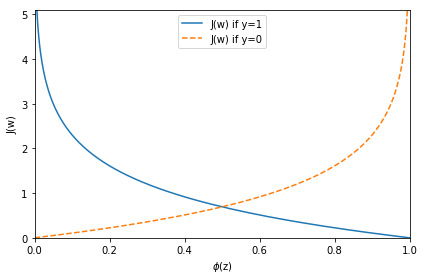

In [90]:
plt.plot(phi_z, c1, label='J(w) if y=1');
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0');
plt.ylim(0.0, 5.1); plt.xlim([0, 1]);
plt.xlabel('$\phi$(z)'); plt.ylabel('J(w)');
plt.legend(loc='upper center'); plt.tight_layout();
plt.show()

#### ADALINE実装をロジスティック回帰のアルゴリズムに変換する
ロジスティック回帰を独自に実装する場合は2章で行ったADALINE実装のコスト関数Jを新しいコスト関数に置き換えるだけでよい。

$$
J(w) = - \sum _{i} \left [ y^{(i)} \log ( \phi (z^{(i)}) ) + (1 - y^{(i)} ) \log (1 - \phi (z^{(i)})) \right ]
$$

+ 2章（ADALINE(単層ニューラルネットワーク)）より追加で行うこと
  + コスト関数を書き換える
  + 線形活性化関数をシグモイド活性化関数に置き換える
  + しきい値関数を書き換えて-1と1の代わりにクラスラベル0と1を返すようにする

#### ロジスティック回帰での勾配降下法に基づく学習アルゴリズム
まずロジスティック回帰における対数尤度
$$
l(w) = \log L(w) = \sum _{i=1}^{n} [ y^{(i)} \log ( \phi (z^{(i)}) ) + (1-y^{(i)}) \log (1-\phi(z^{(i)})) ]
$$
を最小化する際に対数尤度を各パラメータで偏微分すると、
$$
\frac{ \partial l(w) }{ \partial w_j } = \frac{ \partial l(w) }{ \partial \phi (z) } \frac{ \partial \phi (z) }{ \partial w_j }  = \left ( y \frac{1}{ \phi (z) }  - (1-y) \frac{1}{1- \phi (z) }  \right) \frac{ \partial \phi (z) }{ \partial w_j}
$$
シグモイド関数φ(z)の偏導関数は以下のように書き換えることができる。
$$
\frac{ \partial \phi (z) }{ \partial z } = \frac{ \partial (1+ e^{-z})^{-1} }{ \partial z } = \frac{ \partial (1+ e^{-z})^{-1} }{ \partial (1+ e^{-z}) } \frac{ \partial (1+ e^{-z}) }{ \partial z } = \frac{1}{1+e^{-z}} \left ( 1 - \frac{1}{1+e^{-1}} \right ) \\
= \phi (z) ( 1 - \phi (z) )
$$


$$
\frac{ \partial l(w) }{ \partial w_j } = \left ( y \frac{1}{ \phi (z) }  - (1-y) \frac{1}{1- \phi (z) }  \right) \frac{ \partial \phi (z) }{ \partial z} \frac{ \partial z }{ \partial w_j} = \left ( y \frac{1}{ \phi (z) }  - (1-y) \frac{1}{1- \phi (z) }  \right) \phi (z) ( 1 - \phi (z) ) \frac{ \partial z }{ \partial w_j} \\
= \left ( y ( 1- \phi (z) )  - (1-y) \phi (z) \right)  x_j \\
= ( y - \phi (z) )x_j
$$
対数尤度のを最大化する重みの更新式は  
$$
w_j := w_j + \eta \sum _{i=1}^{n} \left ( y^{(i)} - \phi ( z^{(i)})  \right ) x_j^{(i)}
$$
あるいは
$$
w := w + \eta \nabla l(w)
$$
と表される。コスト関数を最小化したものと導関数が同じであるため、この重みの更新式は以下のようにも表すことができる。
$$
\Delta w_j = -\eta \frac{\partial J}{ \partial w_j }　= \eta \sum _{i=1}^{n} \left ( y^{(i)} - \phi ( z^{(i)})  \right ) x_j^{(i)}
$$
これは2章のADALINEの勾配降下法と同じ更新式となっている。

In [144]:
class LogisticRegressionGD(object):
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors  = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            
            cost = - y.dot(np.log(output)) - (  (1-y).dot(np.log(1 - output)))
            self.cost_.append(cost)
            
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, z):
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)
    

In [145]:
# class LogisticRegressionGD(object):
#     def __init__(self, eta=0.05, n_iter=100, random_state=1):
#         self.eta = eta
#         self.n_iter = n_iter
#         self.random_state = random_state

In [146]:
# class LogisticRegressionGD(object):
#
#  (omission)
#
#     def fit(self, X, y):
#         rgen = np.random.RandomState(self.random_state)
#         self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
#         self.cost_ = []
#         for i in range(self.n_iter):
#             net_input = self.net_input(X)
#             output = self.activation(net_input)
#             errors  = (y - output)
#             self.w_[1:] += self.eta * X.T.dot(errors)
#             self.w_[0] += self.eta * errors.sum()
#             cost = - y.dot(np.log(output)) - (  (1-y).dot(np.log(1 - output)))
#             self.cost_.append(cost)
#         return self

In [147]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v') # マーカー
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan') # 色
    cmap = ListedColormap(colors[:len(np.unique(y))]) # Colormap object generated from a list of colors.
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1 # 領域を描くに際して最大値、最小値の情報を取得
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), # Return coordinate matrices from coordinate vectors.
                                              np.arange(x2_min, x2_max, resolution)) # resolutionはgridの1単位に該当する
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T) # ravelで1次元のベクトルにして転置して予測
    Z = Z.reshape(xx1.shape)  # Zはただのベクトルなのでxx1と同じデータ構造に変換する
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap) # 等高線を描く
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)): # enumerateは引数にリストなどのイテラブルオブジェクトを指定すると、インデックス番号(idx)と要素(cl)が取得できる。
        plt.scatter(x = X[y == cl, 0],
                            y = X[y == cl, 1],
                            alpha = 0.8,
                            c = colors[idx],
                            marker=markers[idx],
                            label=cl,
                            edgecolor='black'
                            )        

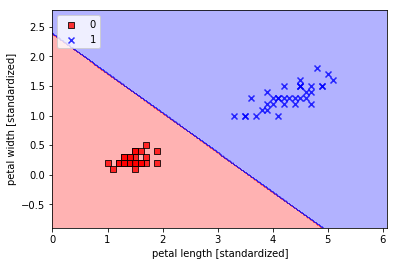

In [165]:
X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGD(n_iter=100, eta=0.01, random_state=1)
lrgd.fit(X_train_01_subset, y_train_01_subset)

plot_decision_regions(X = X_train_01_subset,
                                        y = y_train_01_subset,
                                        classifier=lrgd
                     )
plt.xlabel('petal length [standardized]');
plt.ylabel('petal width [standardized]');
plt.legend(loc='upper left');
plt.show()

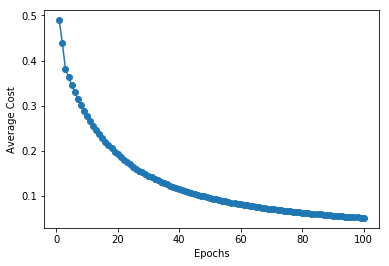

In [166]:
plt.plot(range(1, len(lrgd.cost_) + 1), [ cost/100 for cost  in lrgd.cost_ ], marker='o');
plt.xlabel('Epochs');
plt.ylabel('Average Cost');
plt.show()

#### scikit-learnでのロジスティック回帰

In [185]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v') # マーカー
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan') # 色
    cmap = ListedColormap(colors[:len(np.unique(y))]) # Colormap object generated from a list of colors.
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1 # 領域を描くに際して最大値、最小値の情報を取得
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), # Return coordinate matrices from coordinate vectors.
                                              np.arange(x2_min, x2_max, resolution)) # resolutionはgridの1単位に該当する
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T) # ravelで1次元のベクトルにして転置して予測
    Z = Z.reshape(xx1.shape)  # Zはただのベクトルなのでxx1と同じデータ構造に変換する
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap) # 等高線を描く
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)): # enumerateは引数にリストなどのイテラブルオブジェクトを指定すると、インデックス番号(idx)と要素(cl)が取得できる。
        plt.scatter(x = X[y == cl, 0],
                            y = X[y == cl, 1],
                            alpha = 0.8,
                            c = colors[idx],
                            marker=markers[idx],
                            label=cl,
                            edgecolor='black'
                            )
        
        # テストサンプルを目立たせる
        if test_idx:
            # すべてのサンプルをプロット
            X_test, y_test = X[test_idx, :], y[test_idx]
            plt.scatter(X_test[:, 0], X_test[:, 1],
                               c='',
                               edgecolor='black',
                               alpha=1.0,
                               linewidth=1,
                               marker='o',
                               s=100,
                               label='test set')

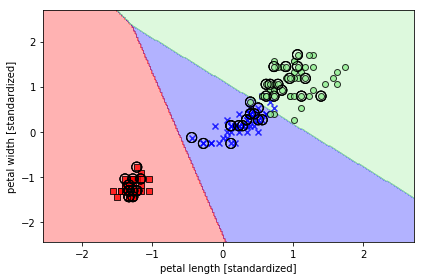

In [113]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0,
                                        random_state=1)
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=lr,test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.tight_layout()
plt.show()

In [114]:
lr.predict_proba(X_test_std[:3, :])

array([[3.17983737e-08, 1.44886616e-01, 8.55113353e-01],
       [8.33962295e-01, 1.66037705e-01, 4.55557009e-12],
       [8.48762934e-01, 1.51237066e-01, 4.63166788e-13]])

In [115]:
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0])

In [117]:
lr.predict(X_test_std[:3, :])

array([2, 0, 0])

In [118]:
lr.predict(X_test_std[0, :].reshape(1, -1))

array([2])

#### ロジスティック回帰の確率的勾配降下法の実装
教科書には書かれていないが、練習問題的にやってみる。やったことは先程と同様に以下の3つを、2章で学んだ確率的勾配降下法に対して適用しただけ。
+ コスト関数を書き換える
+ 線形活性化関数からシグモイド活性化関数に書き換える
+ しきい値関数を書き換えて-1と1の代わりにクラスラベル0と1を返すようにする

In [137]:
from numpy.random import seed

class LogisticRegressionSGD(object):
    def __init__(self, eta=0.05, n_iter=100, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, X, y):
        self._initialize_weights(X.shape[1]) # 重みの初期化
        self.cost_ = [] # コストの空箱1
        for i in range(self.n_iter):
            if self.shuffle: # shuffleに関するBoolean。
                X, y = self._shuffle(X, y) # インスタンスをシャッフルしたもの
            cost = [] # コストの空箱2
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi,target)) # 一つずつ更新式に従って更新した際のコストの値を返す
            avg_cost = sum(cost)/len(y) # 平均コストを計算する
            self.cost_.append(avg_cost) # 平均コストをappendする
        return self
    
    def partial_fit(self, X, y):
        if not self.w_initialized:
            self._initialize_weights(X.shape[1]) # 重みの初期化
        if y.ravel().shape[0] > 1: # yの数が1よりも大きい場合
            for xi, target  in zip(X, y):
                self._update_weights(xi,target) # 繰り返して重みベクトルを更新
        else:
            self._update_weights(X, y) # yが1個しかない場合は1回だけ重みベクトルを更新
        return self
    
    def _shuffle(self, X, y):
        r = self.rgen.permutation(len(y)) # 並び替えられたインスタンスのインデックス
        return X[r], y[r]
    
    def _initialize_weights(self, m): # 重みの初期化
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        output = self.activation(self.net_input(xi)) # 活性化関数
        error = (target - output) # 誤差
        self.w_[1:] += self.eta * xi.dot(error) # 更新式に従って重みベクトルの更新
        self.w_[0] += self.eta*error # バイアスユニットだけ別で更新
        cost = - target*np.log(output) -   (1-target)*np.log(1 - output)
        return cost
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, z):
        return 1. / ( 1. + np.exp(-np.clip(z, -250, 250)) )
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)

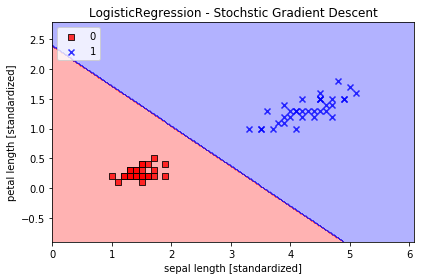

In [167]:
lr_sgd = LogisticRegressionSGD(n_iter=100, eta=0.01, random_state=1)
lr_sgd.fit(X_train_01_subset, y_train_01_subset)
plot_decision_regions(X_train_01_subset, y_train_01_subset, classifier=lr_sgd)
plt.title('LogisticRegression - Stochstic Gradient Descent');
plt.xlabel('sepal length [standardized]');
plt.ylabel('petal length [standardized]');
plt.legend(loc='upper left');
plt.tight_layout();
plt.show()

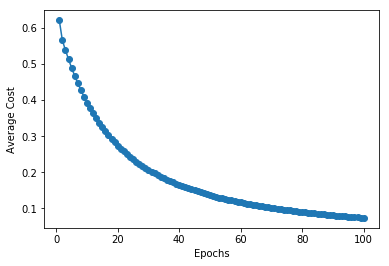

In [168]:
plt.plot(range(1, len(lr_sgd.cost_) + 1), lr_sgd.cost_, marker='o');
plt.xlabel('Epochs');
plt.ylabel('Average Cost');
plt.show()

### 正則化
+ 過学習
 + トレーニングデータセットではうまく機能するモデルが未知のデータではうまく汎化されないという問題のこと。
  + 原因
    + パラメータの数が多すぎ、データに対してモデルが複雑である（バリアンスが高い）
+ 学習不足
    + 学習が足りず、未知のデータに対する予測性能が低いという問題のこと。
    + 原因
        + トレーニングデータセットのパターンを把握できるようなモデルの複雑さがない（バイアスが高い）

In [119]:
Image(url="https://media.geeksforgeeks.org/wp-content/cdn-uploads/20190523171258/overfitting_2.png")

#### バイアスとバリアンス
+ バイアス
 + モデルを異なるトレーニングデータセットで何度か構築した場合に、予測が正しい値からどの程度外れているかを計測するもの。
   + バイアスが高いということは正しい値から外れまくっているということ。
+ バリアンス
 + モデルの予測の一貫性を計測するもの
   + バリアンスが高いということは所与のデータセットに対して当てはめすぎているということ。
   
+ モデルの汎化誤差
$$
モデルの汎化誤差 = (バイアス)^2 + バリアンス + ノイズ
$$

バイアスもバリアンスも小さくなるようにモデルを構築することが望ましい。

In [120]:
Image(url="https://www.learnopencv.com/wp-content/uploads/2017/02/Bias-Variance-Tradeoff-In-Machine-Learning-1.png")

#### 正則化
+ 極端なパラメータの重みにペナルティを科すための追加情報（バイアス）を導入すること。
  + つまり、正しい情報からある程度はずさせる方向への処理。
+ 共線性(特徴間の相関の高さ)を処理するのに便利な手法

+ 種類
 + L2正則化(Ridge)：Ridgeは尾根と訳せるので、山をイメージすれば2次関数のイメージが湧く。
   + L2縮小推定や荷重減衰とも呼ばれる。
 + L1正則化（LASSO）：Least Absolute Shrinkage and Selection Operatorの略。
 
 
 + L2の正則化項について
 $$
 \frac{\lambda}{2} \| w\| ^2 = \frac{\lambda}{2} \sum _{j=1}^{m}w^2_j
 $$
 λは正則化パラメータ。このパラメータを使うことで重みを小さく保ちながらトレーニングデータセットをどの程度適合させるかを制御できる。λを大きくすれば正則化の度合いを強めることができる。

+ 正則化の適用
 + ロジスティック回帰のコスト関数に正則化の項を追加すれば良い。

$$
J(w) = - \sum _{i} \left [ y^{(i)} \log ( \phi (z^{(i)}) ) + (1 - y^{(i)} ) \log (1 - \phi (z^{(i)})) \right ] +  \frac{\lambda}{2} \| w\| ^2
$$
scikit-learnのパラメータCはここでいう、
$$
C = \frac{1}{\lambda}
$$
に該当する。なお、デフォルトの設定ではl2正則化となっており、Cのデフォルト値が1となっている。つまりλが1のケースとなる。
この関係を元のコスト関数に代入して、両辺にCを掛けるとコスト関数は以下のようになる。
$$
J(w) = - C \sum _{i} \left [ y^{(i)} \log ( \phi (z^{(i)}) ) + (1 - y^{(i)} ) \log (1 - \phi (z^{(i)})) \right ] +  \frac{1}{2} \| w\| ^2
$$
この式から、Cの値を小さくすると正則化の強さを高めることがわかる。

In [124]:
#  scikit-learnのロジスティック回帰モデルの該当箇所
#  https://github.com/scikit-learn/scikit-learn/blob/b194674c4/sklearn/linear_model/_logistic.py#L1191
#     C : float, default=1.0
#         Inverse of regularization strength; must be a positive float.
#         Like in support vector machines, smaller values specify stronger
#         regularization.
#        
#        (omission)
#
#         if self.penalty == 'none':
#             if self.C != 1.0:  # default values
#                 warnings.warn(
#                     "Setting penalty='none' will ignore the C and l1_ratio "
#                     "parameters"
#                 )
#                 # Note that check for l1_ratio is done right above
#             C_ = np.inf
#             penalty = 'l2'
#         else:
#             C_ = self.C
#             penalty = self.penalty

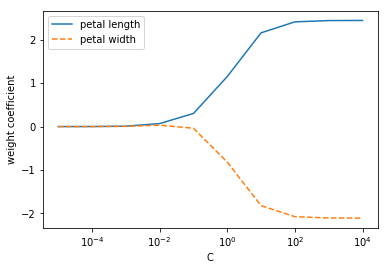

In [123]:
weights, params = [], []

for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c, random_state=1)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.0**c)
    
weights = np.array(weights)
plt.plot(params, weights[:, 0], label='petal length')
plt.plot(params, weights[:, 1], linestyle='--', label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

### サポートベクトルマシン
+ マージンを最大化させることで誤分類率を最小化することを目指した手法。
  + マージンとは超平面（決定境界）と超平面に最も近いトレーニングサンプルとの間の距離として定義される。
  + 超平面に最も近いトレーニングサンプルのことをサポートベクトルと呼ぶ。
+ パーセプトロンの拡張とみなすことができる。

In [169]:
Image(url="https://static.packt-cdn.com/products/9781787125933/graphics/B07030_03_09.jpg")

#### 最大マージンの直感的理解
+ 決定境界のマージンを大きくする理論的根拠
 + 汎化誤差が小さくなる傾向がある。
 + マージンが小さいとモデルは過学習に陥りがち。

超平面は以下の方程式で表すことができる。（1つ目は正の超平面、2つ目は負の超平面）
$$
w_0 + w^T x_{pos} = 1 \\
w_0 + w^T x_{neg} = -1
$$
これらを引き算すると、
$$
w^T ( x_{pos} - x_{neg} ) = 2
$$
となる。ここで正と負の超平面の距離は高校数学で学ぶ「点と平面の距離」から、
$$
\frac{w^T ( x_{pos} - x_{neg} ) }{  \| w\|  } = \frac{ 2 }{  \| w\|  }
$$
この距離をサポートベクトルマシンは最大化する。

#### 線形分離可能なケース
サポートベクトルマシンは
$$
\frac{ 2 }{  \| w\|  }
$$
の最大化を以下の制約のもとで行う。
$$
        \begin{cases}
           w_0 + w^Tx^{(i)} \geqq 1 \quad y^{(i)} =  1 \\
           w_0 + w^Tx^{(i)} \leq -1 \quad y^{(i)} = -1 \\
        \end{cases} \\
         i = 1, \dots , N
$$
これらの制約式は以下のように表すこともできる。
$$
y^{(i)}(w_0 + w^T x^{(i)}) \geqq 1 \quad  \forall _i
$$
ただ、このような関数の最大化よりも逆数をとって2乗した
$$
\frac{ 1 }{ 2 }  \| w\|^2
$$
を最小化するほうが簡単であり、KKT（Karush-Kuhn-Tucker）条件を使って解くことができる。このように置き換えた問題を双対問題と呼ぶ。

#### スラック変数を使った線形分離不可能なケースへの対応
+ 先程のアプローチは線形分離が可能なデータを前提としていた。（パーセプトロンに近いと感じられる）
+ スラック変数を導入することで適切なコストペナルティを課した上で、誤分類が存在する状態のまま最適化問題を収束させることができる。

$$
        \begin{cases}
           w_0 + w^Tx^{(i)} \geqq 1 - \xi ^{(i)} \quad y^{(i)} =  1 \\
           w_0 + w^Tx^{(i)} \leq -1 + \xi ^{(i)} \quad y^{(i)} = -1 \\
        \end{cases} \\
         i = 1, \dots , N
$$
スラック変数を使った場合、最小化の目的関数は以下のようになる。
$$
\frac{1}{2} \| w \| ^2 + C \left (  \sum _i \xi ^{(i)} \right )
$$
変数Cを使うことで誤分類のペナルティを制御することができる。Cの値が大きい場合は誤分類のペナルティが大きく、小さい場合は寛大である。

In [170]:
Image(url="https://cdn-ak.f.st-hatena.com/images/fotolife/r/robonchu/20171007/20171007164718.png")

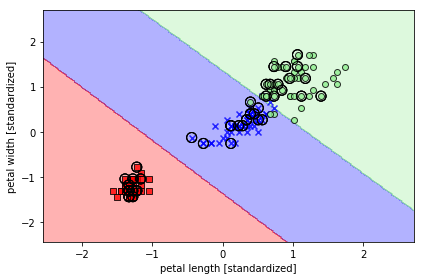

In [174]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm,
                                         test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.tight_layout()
plt.show()

#### ロジスティック回帰とSVM
+ SVMの利点
 + 外れ値の影響を受けにくい。
+ SVMの欠点
 + 実装がしにくい。
 + 更新を簡単にできない。ストリーミングデータなどは苦手。

In [175]:
from sklearn.linear_model import SGDClassifier
ppn = SGDClassifier(loss='perceptron')
lr = SGDClassifier(loss='log')
svm = SGDClassifier(loss='hinge')

### カーネルSVM
+ 非線形分類の問題を解くことに適した手法

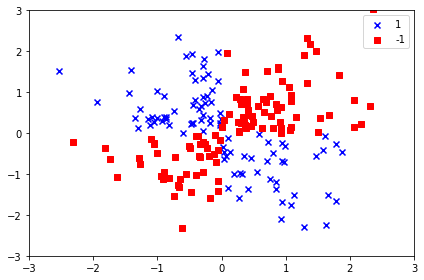

In [179]:
# 線形分離不可能なデータを作る
import matplotlib.pyplot as plt
import numpy as np

X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor =np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1],
                    c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor==-1, 0], X_xor[y_xor==-1, 1],
                    c='r', marker='s', label='-1')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

線形ロジスティック回帰や線形SVMでは線形超平面を描いて分類をするだけなので、このような線形分離不可能なデータに対してはうまくいかない。

#### カーネルトリック
+ カーネルトリックの発想
 + 射影関数φを使って、トレーニングデータセットを高次元空間に変換し、線形分離可能にすること。
  + 高次元にする過程で新しいデータ（未知のデータ）が作られることになる。
   
 $$
 \phi (x_1, x_2 ) = ( z_1, z_2, z_3 ) = (x_1, x_2 , x^2_1 + x^2_2 )
 $$

+ カーネルとは2つのインスタンス間の類似性を表す関数と解釈される。

In [180]:
Image(url="https://cdn-ak.f.st-hatena.com/images/fotolife/e/enakai00/20171013/20171013103327.png")

 + SVMをトレーニングする際に、ベクトルのドット積の計算が必要だが、この計算のコストは高いとされている。
   + カーネル関数はこのドット積を代替するものとして導入される。

$$
\varkappa \left ( x^{}(i) , x^{(j)} \right ) = \phi \left ( x^{(i)} \right ) ^T   \phi \left ( x^{(j)} \right )
$$
最も用いられるカーネルが動径基底関数カーネル(RBFカーネル、ガウスカーネルとも呼ばれる。)
$$
\varkappa \left ( x^{}(i) , x^{(j)} \right ) = \exp \left (  - \frac{\|  x^{(i)} - x^{(j)} \| ^2}{2 \sigma^2}  \right )
$$
これは以下のように簡略化される。
$$
\varkappa \left ( x^{}(i) , x^{(j)} \right ) = \exp \left (  - \gamma \|  x^{(i)} - x^{(j)} \| ^2 \right )
$$
ここで、
$$
\gamma = \frac{1}{2\sigma^2}
$$
は最適化されるハイパーパラメータとして扱われる。  
式から明らかなように、このカーネルは0から1の範囲に収まることがわかる。また、ベクトルの差のノルムの2乗とすることで、ドット積の計算を回避していることがわかる。

In [182]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v') # マーカー
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan') # 色
    cmap = ListedColormap(colors[:len(np.unique(y))]) # Colormap object generated from a list of colors.
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1 # 領域を描くに際して最大値、最小値の情報を取得
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), # Return coordinate matrices from coordinate vectors.
                                              np.arange(x2_min, x2_max, resolution)) # resolutionはgridの1単位に該当する
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T) # ravelで1次元のベクトルにして転置して予測
    Z = Z.reshape(xx1.shape)  # Zはただのベクトルなのでxx1と同じデータ構造に変換する
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap) # 等高線を描く
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)): # enumerateは引数にリストなどのイテラブルオブジェクトを指定すると、インデックス番号(idx)と要素(cl)が取得できる。
        plt.scatter(x = X[y == cl, 0],
                            y = X[y == cl, 1],
                            alpha = 0.8,
                            c = colors[idx],
                            marker=markers[idx],
                            label=cl,
                            edgecolor='black'
                            )        

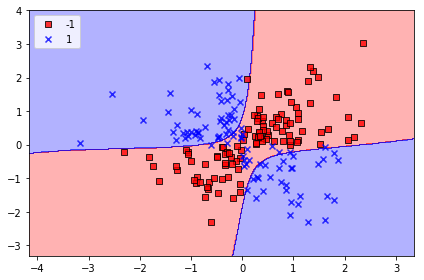

In [184]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

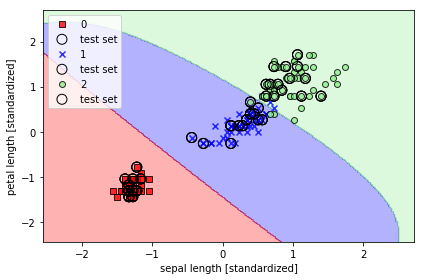

In [187]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm,
                                         test_idx=range(105, 150))
plt.xlabel('sepal length [standardized]');
plt.ylabel('petal length [standardized]');
plt.legend(loc='upper left');
plt.tight_layout();
plt.show()

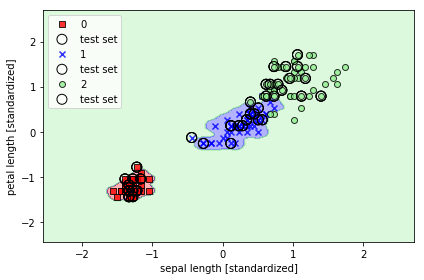

In [188]:
svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm,
                                         test_idx=range(105, 150))
plt.xlabel('sepal length [standardized]');
plt.ylabel('petal length [standardized]');
plt.legend(loc='upper left');
plt.tight_layout();
plt.show()

### 決定木学習
+ 一連の質問に基づいて決断を下すという方法によりデータを分類するモデル。
 + 意味解釈可能性を配慮する場合に魅力的なモデル。
 + カテゴリデータでも数量データでも扱うことができる。
 + 決定木の根（ルート）から始めて、情報利得が最大となる特徴量でデータを分割する。

In [189]:
Image(url="https://static.commonlounge.com/fp/original/3gaQtwvzuLaAtx1HpaCG5Qgnl1520487539_kc")

#### 情報利得の最大化
決定木学習アルゴリズムにおいて最適化を行う目的関数は以下の情報利得を定義する。
$$
IG(D_p , f) = I(D_p) - \sum _{j=1}^{m} \frac{N_j}{N_p} I(D_j)
$$
f：分割を行う特徴量  
D_p：親のデータセット  
D_j：j番目の子ノードのデータセット  
I：不純度を数値化したもの  
N_p：親ノードのサンプルの総数  
N_j：j番目の子ノードのサンプルの個数

情報利得は「親ノードの不純度」と「子ノードの不純度の合計」との差によって測られる。子ノードの不純度が低いほど、目的関数の情報利得は大きくなる。

+ 二分決定木：組み合わせ探索空間をへらすために全ての親ノードを考慮せず、2つの親ノードだけを考慮している。

$$
IG(D_p, f) = I(D_p) - \frac{N_{left}}{N_p} I(D_{left}) - \frac{N_{right}}{N_p} I(D_{right})
$$


+ 不純度の指標、分割条件
 + ジニ不純度
 + エントロピー
 + 分類誤差

+ エントロピー：全ての空ではないクラスi（ p( i | t ) ≠ 0 ）を対象としている。
  + あるできごと（事象）が起きた際、それがどれほど起こりにくいかを表す尺度とされる。
$$
I_H(t) = - \sum_{i=1}^{c} p(i | t) \log_2 p(i|t)
$$
 p( i | t )は特定のノードtにおいてクラスiに属するサンプルの割合を表す。あるノードtにおいて、全てのクラスがiであったり、全てがiでなかったりする場合はエントロピーは0になる。
 
   +  p( i = 1 | t ) =1の場合
     + 対数の箇所において0となり、エントロピーは0に
   +  p( i = 0 | t ) =0の場合
     + 0となる箇所があるので、エントロピーは0に
   
エントロピーが最大になるのは各クラスが一様に分布している場合
 +  p( i = 1 | t ) =0.5の場合
   + 対数の箇所において-1となり、エントロピーは1に
 +  p( i = 0 | t ) =0.5の場合
   + 対数の箇所において-1となり、エントロピーは1に
   
相互情報量とは、「一方を知った後にも残る、もう一方の不確かさの量」を表すので、エントロピーが大きくなるとき、相互情報量が大きくなることがわかる。つまり、 p( i = 1 | t ) =1の場合、それを知った時点でもう一方の不確かさは全くなくなることがわかる。

+ ジニ不純度
 + 誤分類の確率を最小化する条件。
   + エントロピーと同様にジニ不純度が最大になるのは、クラスが完全に混合されている場合。
$$
I_G(t) = - \sum_{i=1}^{c} p(i | t) (1- p(i | t)) = 1 - \sum_{i=1}^{c} p(i|t)^2
$$

   + 二値分類の際にクラスが完全に混合されているケース 
$$
I_G(t) = 1 - \sum_{i=1}^{c} 0.5^2 = 0.5
$$

+ 分類誤差
 + ノードのクラス確率の変化にあまり敏感ではないため、決定木を成長させるのに適していない。
 
 $$
 I_E(t) = 1 - max \{  p (i | t) \}
 $$
 
 + A
   + (40, 40)
     + (30, 10)
     + (10, 30)
 + B
   + (40, 40)
     + (20, 40)
     + (20, 0)

+ 分類誤差の場合
$$
I_E(D_p) = 1 - 0.5 = 0.5 \\
\\
I_E(D_{left}) = 1 - \frac{30}{30+10} = 0.25 \\
I_E(D_{right}) = 1 - \frac{30}{10+30} = 0.25 \\
IG_E = 0.5 - \frac{30+10}{40+40} \times I_E(D_{left})  -   \frac{10+30}{40+40}  \times I_E(D_{right}) = 0.25  \quad (scenario \ A) \\
\\
I_E(D_{left}) = 1 - \frac{40}{20 + 40} = \frac{1}{3} \\
I_E(D_{right}) = 1 - \frac{20}{20} = 0 \\
IG_E = 0.5 - \frac{20 + 40}{40+40} \times I_E(D_{left})  -   \frac{20+0}{40+40}  \times I_E(D_{right}) = 0.25  \quad (scenario \ B) \\
$$

+ ジニ不純度の場合
$$
I_G(D_p) = 1 - (0.5^2 + 0.5^2) = 0.5 \\
\\
I_G(D_{left}) = 1 - \left ( \left ( \frac{30}{30+10}  \right )^2   + \left ( \frac{10}{30 + 10}  \right )^2   \right ) = 0.375 \\
I_G(D_{right}) = 1 -\left ( \left ( \frac{10}{10+30}  \right )^2   + \left ( \frac{30}{10 + 30}  \right )^2   \right ) = 0.375 \\
IG_G = 0.5 - \frac{30+10}{40+40} \times I_G(D_{left})  -   \frac{10+30}{40+40}  \times I_G(D_{right}) = 0.125  \quad (scenario \ A) \\
\\
I_G(D_{left}) = 1 - \left ( \left ( \frac{20}{20+40}  \right )^2   + \left ( \frac{40}{20 + 40}  \right )^2   \right ) = 0.4 \\
I_G(D_{right}) = 1 -\left ( \left ( \frac{20}{20+0}  \right )^2   + \left ( \frac{0}{20 + 0}  \right )^2   \right ) = 0 \\
IG_G = 0.5 - \frac{30+10}{40+40} \times I_G(D_{left})  -   \frac{10+30}{40+40}  \times I_G(D_{right}) = 0.16  \quad (scenario \ B) \\
$$

+ エントロピーの場合
$$
I_H(D_p) = - \left ( \frac{40}{40+40} \log \left (  \frac{40}{40+40} \right ) + \frac{40}{40+40} \log \left (  \frac{40}{40+40} \right ) \right ) = 1 \\
\\
I_H(D_{left}) = a = 0.375 \\
I_H(D_{right}) = a  = 0.375 \\
IG_H = 0.5 - \frac{30+10}{40+40} \times I_H(D_{left})  -   \frac{10+30}{40+40}  \times I_H(D_{right}) =   \quad (scenario \ A) \\
\\
I_H(D_{left}) = a = 0.4 \\
I_H(D_{right}) = a = 0 \\
IG_H = 0.5 - \frac{30+10}{40+40} \times I_H(D_{left})  -   \frac{10+30}{40+40}  \times I_H(D_{right}) = 0.16  \quad (scenario \ B) \\
$$

### k近傍法：怠惰学習アルゴリズム